# Predictions and Results

In [1]:
#| echo: false
#| code-fold: true
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import requests
import json
np.random.seed(42)
import ipywidgets as widgets
from ipywidgets import interact
import seaborn as sns
import holoviews as hv
import pandas as pd
import panel as pn
import numpy as np
import hvplot.pandas 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import requests
import cenpy
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

C:\Users\cruse\mambaforge1\envs\musa-550-fall-2023\lib\site-packages\libpysal\cg\alpha_shapes.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
C:\Users\cruse\mambaforge1\envs\musa-550-fall-2023\lib\site-packages\libpysal\cg\alpha_shapes.py:165: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
C:\Users\cruse\mambaforge

In [10]:
#| echo: false
#| code-fold: true
data = pd.read_csv('data.csv')

In [11]:
#| echo: false
#| code-fold: true
censustracts = gpd.read_file('Census_Tracts_2010.geojson')
tract_and_geoid = censustracts[['GEOID10', 'TRACTCE10']]
tract_and_geoid = tract_and_geoid.rename(columns = {'TRACTCE10':'tract'})

censustracts = censustracts[['GEOID10', 'geometry']]
censustracts = censustracts.rename(columns = {'GEOID10':'geoid'})
censustracts['geoid'] = censustracts['geoid'].astype(np.int64)

In [12]:
#| echo: false
#| code-fold: true
data = pd.merge(data, censustracts, on='geoid', how ='inner')

In [13]:
#| echo: false
#| code-fold: true
data = gpd.GeoDataFrame(data, geometry = 'geometry')

We plot our predicted asthma prevalence against CDC asthma prevalence predictions per census tract from our test data. From this vizualization, you are able to see our model's predictive capabilities. 

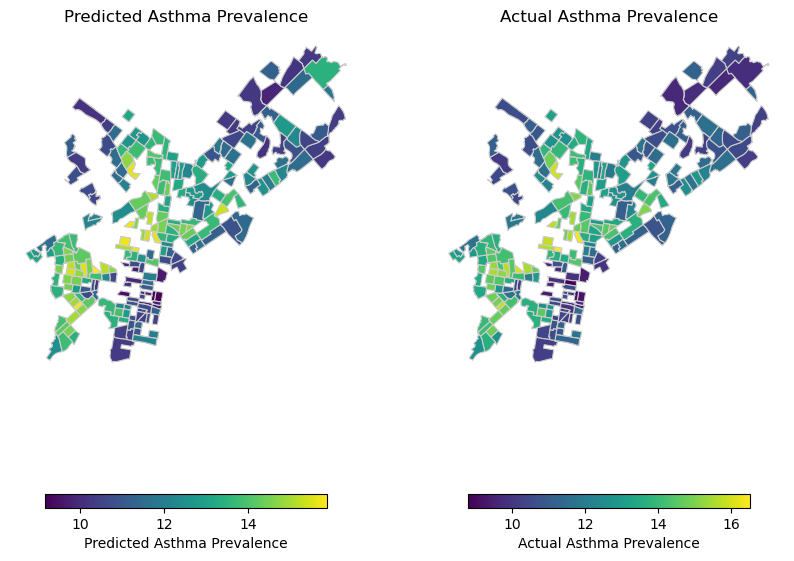

In [15]:
#| echo: true
#| code-fold: true
fig, axs = plt.subplots(ncols=2, figsize=(10, 10))

# Predicted values
data.plot(
    ax=axs[0],
    column='prediction',
    legend=True,
    cmap='viridis',
    linewidth=0.8,
    edgecolor='0.8',
    legend_kwds={'label': "Predicted Asthma Prevalence", 'orientation': "horizontal", 'shrink': 0.8}
)
axs[0].set_title("Predicted Asthma Prevalence")

# Actual values
data.plot(
    ax=axs[1],
    column='asthma_prevalance',
    legend=True,
    cmap='viridis',
    linewidth=0.8,
    edgecolor='0.8',
    legend_kwds={'label': "Actual Asthma Prevalence", 'orientation': "horizontal", 'shrink': 0.8}
)
axs[1].set_title("Actual Asthma Prevalence")

axs[0].set_axis_off()
axs[1].set_axis_off()

plt.show()

# References


Healthy People 2030. (n.d.). Social Determinants of Health. Retrieved from https://health.gov/healthypeople/priority-areas/social-determinants-health
Perelman School of Medicine, University of Pennsylvania. (n.d.). Asthma. Retrieved from https://prcceh.upenn.edu/focus-areas/asthma/#:~:text=According%20to%20the%20Centers%20for,asthma%20%20prevalence%20rate%20of%2021%25

Agency for Toxic Substances and Disease Registry. (n.d.). Environmental Justice and Health. Retrieved from https://www.atsdr.cdc.gov/placeandhealth/eji/index.html

Centers for Disease Control and Prevention. (2023). PLACES: Local Data for Better Health, County Data 2020. Retrieved from https://data.cdc.gov/500-Cities-Places/PLACES-Local-Data-for-Better-Health-County-Data-20/swc5-untb/about_data

City of Philadelphia Office of the Controller. (n.d.). ProgressPhl: Philadelphia Audits. Retrieved from https://controller.phila.gov/philadelphia-audits/progressphl/#/explorer

City of Philadelphia. (2021). Health of the City 2021. Retrieved from https://www.phila.gov/media/20220718132807/HealthOfTheCity-2021.pdf
American Lung Association. (2020). State of the Air - Philadelphia. Retrieved from https://www.lung.org/media/press-releases/state-of-the-air-philadelphia 

Center of Excellence in Environmental Toxicology, University of Pennsylvania. (n.d.). A Look at Children's Environmental Health in Philadelphia. Retrieved from https://ceet.upenn.edu/a-look-at-childrens-environmental-health-in-philadelphia/

U.S. Environmental Protection Agency. (n.d.). Benefits of Green Infrastructure. Retrieved from https://www.epa.gov/green-infrastructure/benefits-green-infrastructure#:~:text=Air%20Quality,-Ground%2DLevel%20Ozone&text=Trees%2C%20parks%2C%20and%20other%20green,absorbing%20and%20filtering%20particulate%20matter

